<a href="https://colab.research.google.com/github/singhshifali/CodSoft_Task2/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

Loading Dataset

In [ ]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Display Statistics about data set

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Displaying basic information about the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# to display the number of each samples on the class
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Preprocessing the Data Set

In [ ]:
# checking for the empty/null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Exploratory Data Analysis

<Axes: >

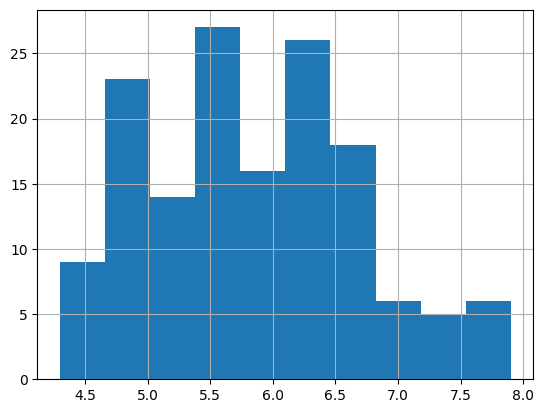

In [ ]:
df['sepal_length'].hist()

<Axes: >

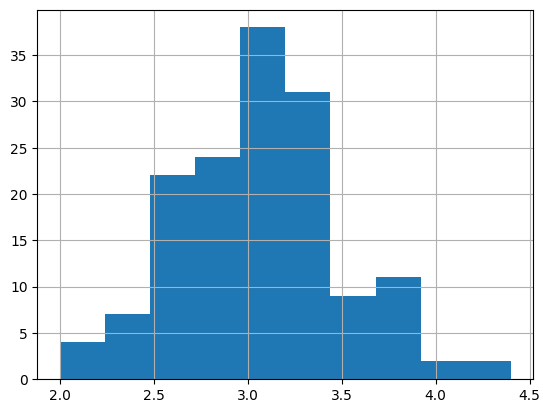

In [ ]:

df['sepal_width'].hist()

<Axes: >

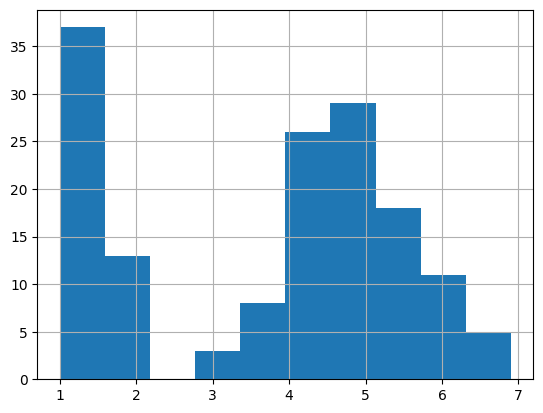

In [ ]:
df['petal_length'].hist()

<Axes: >

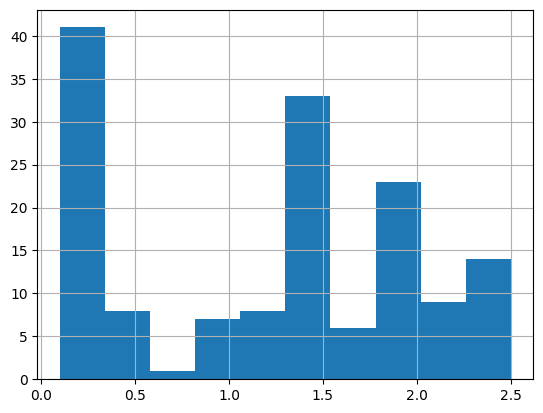

In [ ]:
df['petal_width'].hist()

Scatter Plot

In [ ]:
#defining colours
colors = ['green', 'red', 'purple']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


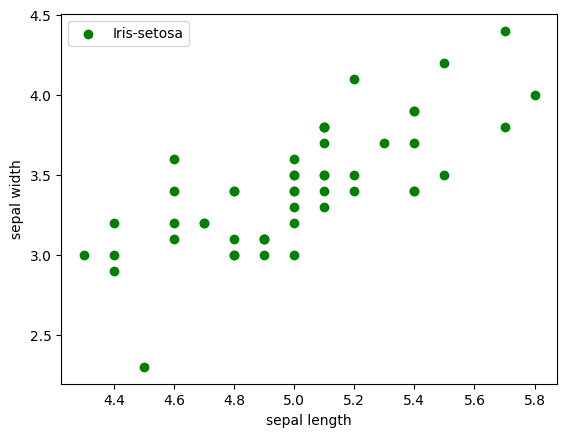

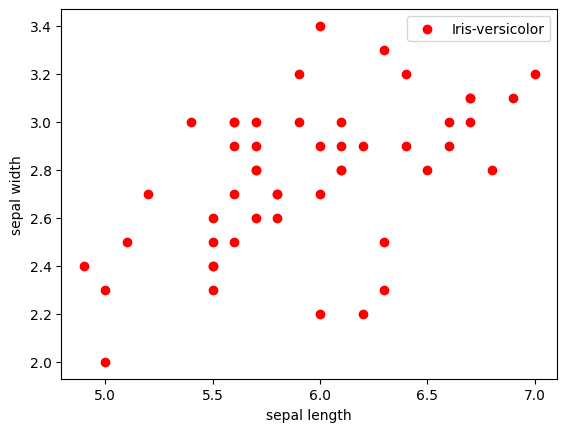

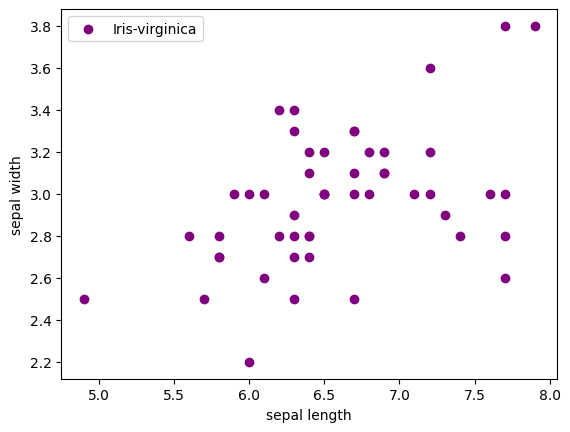

In [ ]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.legend()
    plt.show()


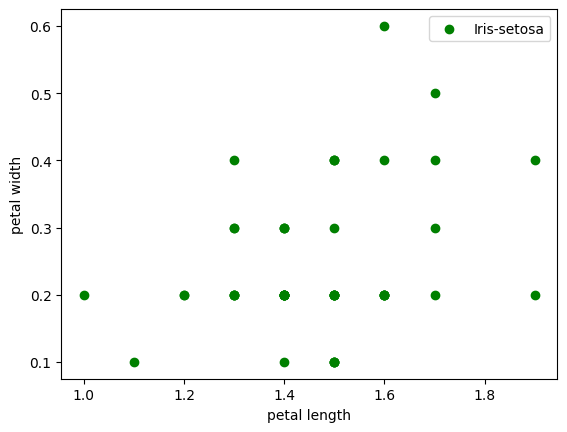

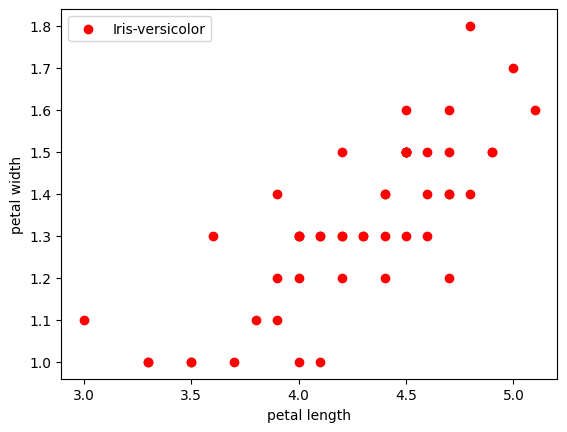

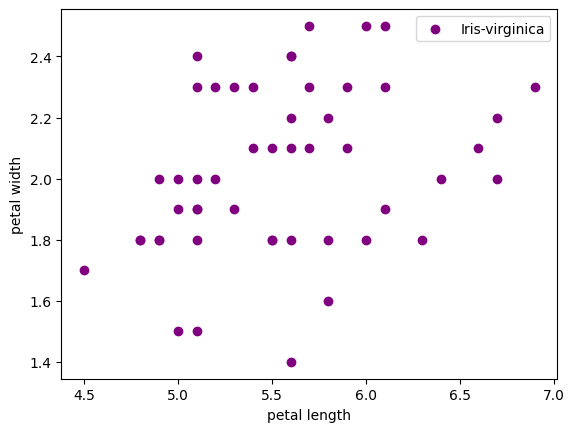

In [ ]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.legend()
    plt.show()

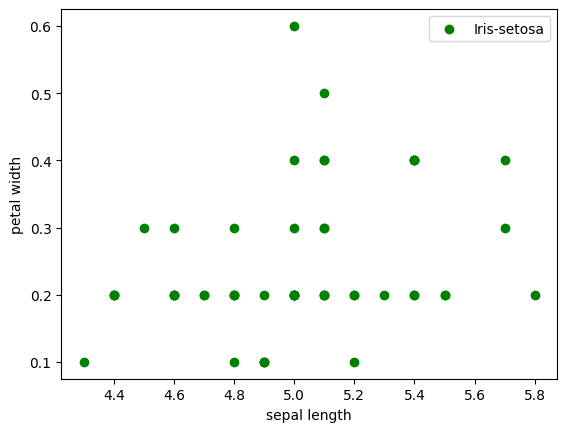

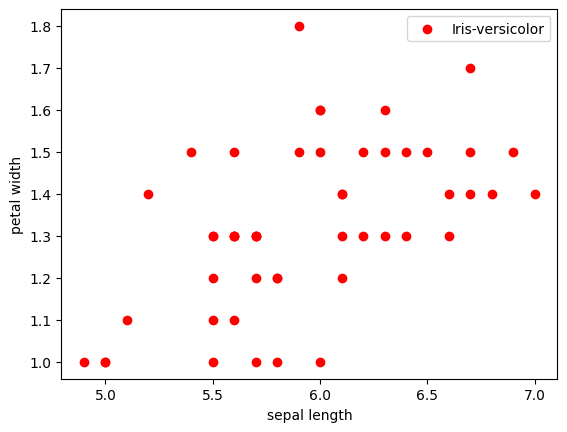

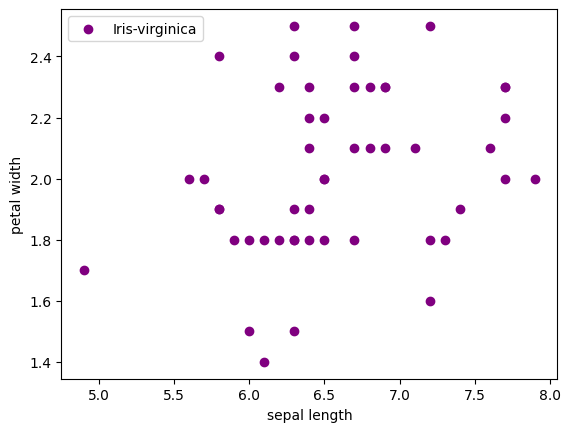

In [ ]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_width'], c = colors[i], label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("petal width")
    plt.legend()
    plt.show()

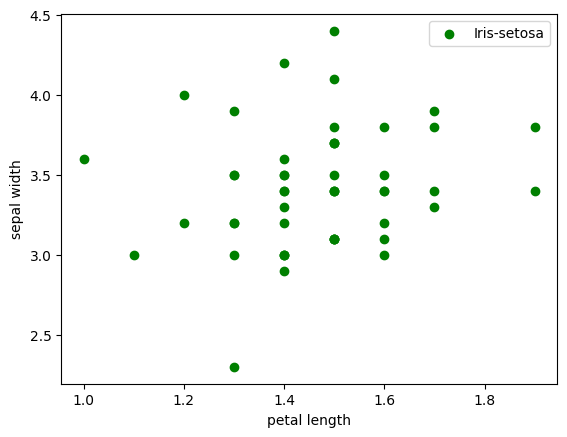

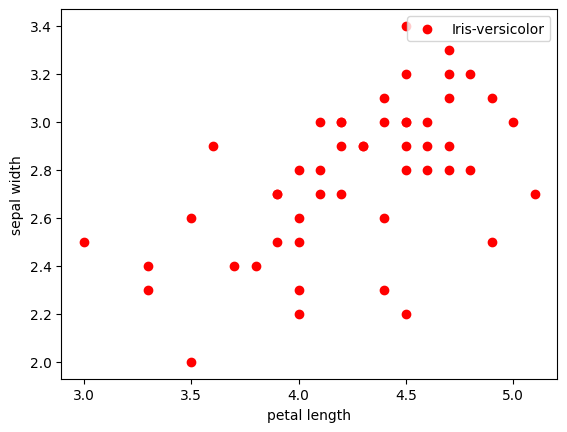

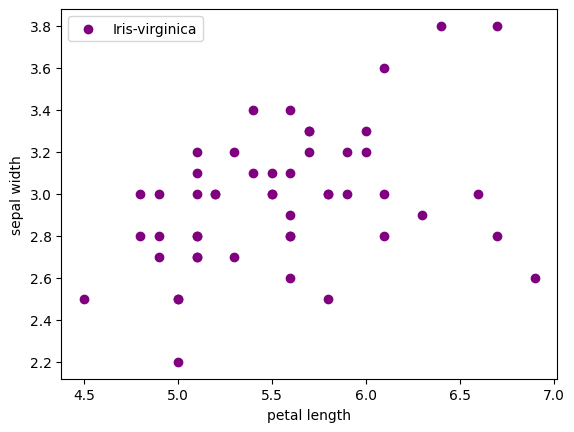

In [ ]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['sepal_width'], c = colors[i], label=species[i])
    plt.xlabel("petal length")
    plt.ylabel("sepal width")
    plt.legend()
    plt.show()

**Coorelation Matrix**
A correlation matrix is a square matrix showing the correlation coefficients between two variables.

In [ ]:
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


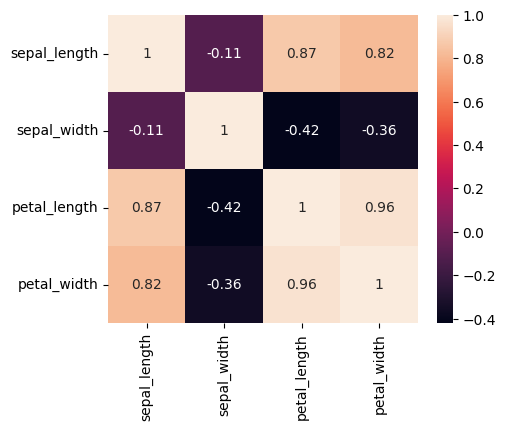

In [ ]:
from inspect import Traceback # This import is not used, you can remove it
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric DataFrame
corr = numeric_df.corr()

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

**Label Encoder**
Label encoding is a simple and effective way to convert categorical variables into numerical form.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['petal_length'] = le.fit_transform(df['petal_length'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,4,0.2,0
1,4.9,3.0,4,0.2,0
2,4.7,3.2,3,0.2,0
3,4.6,3.1,5,0.2,0
4,5.0,3.6,4,0.2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sepal_length'] = le.fit_transform(df['sepal_length'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,3.5,4,0.2,0
1,6,3.0,4,0.2,0
2,4,3.2,3,0.2,0
3,3,3.1,5,0.2,0
4,7,3.6,4,0.2,0


**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(150, 4)
(105, 4)
(45, 4)
(150,)
(105,)
(45,)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# printing metric for getting performance model
print("Accuracy:" , model.score(x_test, y_test))

Accuracy: 0.9777777777777777


In [ ]:
# for displaying the above code in a percentage format
print("Accuracy:" , model.score(x_test, y_test)*100)

Accuracy: 97.77777777777777


In [ ]:
# krun = k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.9555555555555556

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9555555555555556